# Today's Date - 27 June 2023
# Topic - Pooling in CNN

In [16]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Loading MNSIT handwritten data set

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Building model with the pooling layer

In [ ]:
model = Sequential()

#that 32 is number of filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Lets train the model and see the final reults

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=1,validation_split=0.2, verbose=1)

1500/1500 [==============================] - 44s 29ms/step - loss: 0.0828 - accuracy: 0.9755 - val_loss: 0.0689 - val_accuracy: 0.9789


In [17]:
y_prob = model.predict(X_test)

y_pred = y_prob.argmax(axis=1) #gives the index of number whose probability is greatest

accuracy_score(y_test,y_pred)

313/313 [==============================] - 5s 17ms/step


0.9805

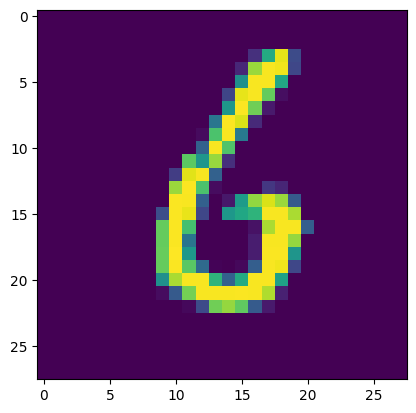

In [18]:
plt.imshow(X_test[50])

In [19]:
y_pred[50]

6